# Data Analysis for Microstruture ML Model

### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras import models

### Path to ML results

In [2]:
results = "results"

### Loads the trained model

In [3]:
model = models.load_model(os.path.join(results,"saved_model"))

### Gets the loss history from the model

In [4]:
history = pd.read_csv(os.path.join(results,"history.csv"))

### Plots the loss history

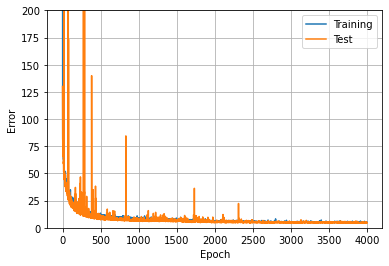

In [5]:
val_loss = history["val_loss"]
loss = history["loss"]
plt.plot(loss, label = "Training")
plt.plot(val_loss, label = "Test")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.ylim(0,200)
plt.savefig("loss_curve")

### Reads the results and statstics CSV files

In [6]:
results_m22 = pd.read_csv(os.path.join(results, "results_m22.csv"))
results_k = pd.read_csv(os.path.join(results, "results_k.csv"))
trainX = pd.read_csv(os.path.join(results,"trainX.csv"))
statistics = pd.read_csv(os.path.join(results,"statistics.csv"))

### Gets the actual and predicted values into arrays

In [7]:
m22_pred = results_m22["Predicted"].values
k_pred = results_k["Predicted"].values

m22_act = results_m22["Actual"].values
k_act = results_k["Actual"].values

# m22_index = statistics[statistics["Parameter"] == "m22"].index
# k_index = statistics[statistics["Parameter"] == "k"].index

# m22_max = statistics.loc[m22_index,"Max"].values
# k_max = statistics.loc[k_index,"Max"].values

m22_max = trainX["m22"].max()
k_max = trainX["k"].max()

### Parity plot for M22

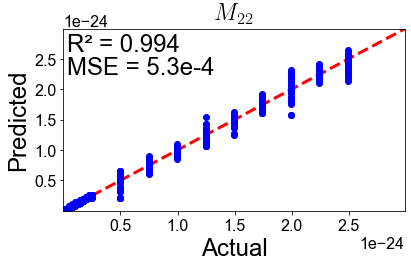

In [15]:
m22_real_pred = m22_pred*m22_max
m22_real_act = m22_act*m22_max
# arial = {"family" : "Arial", "size" : 24}
arial_small = {"family" : "Arial", "size" : 16}

graph_min = m22_real_act.min()*0.8
graph_max = m22_real_act.max()*1.2
line = [graph_min, graph_max]
plt.rc("font", **arial_small)
plt.rc("text", usetex = False)
plt.plot(line, line, "r--", linewidth = 3, zorder = 1)
plt.scatter(m22_real_act, m22_real_pred, zorder = 2, c = "b")
plt.xlim(graph_min, graph_max)
plt.ylim(graph_min, graph_max)
plt.xlabel("Actual", fontsize = 24)
# plt.yticks([0.5e-24,1e-24,1.5e-24,2e-24])
plt.ylabel("Predicted", fontsize = 24)
plt.title(r"$M_{22}$", fontsize = 24, usetex = True)
plt.yticks(np.arange(0.5e-24, 3.0e-24, 0.5e-24))
# plt.gca().set_aspect("equal", adjustable = "box")
# plt.axis("square")
plt.tight_layout()
plt.text(graph_max*0.01,graph_max*0.88,"R\u00B2 = 0.994", fontsize = 24)
plt.text(graph_max*0.01,graph_max*0.75,"MSE = 5.3e-4", fontsize = 24)
plt.savefig("m22_plot", dpi = 300)

### Parity plot for Kappa

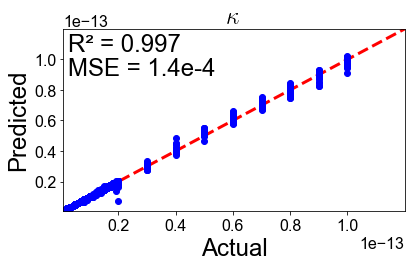

In [9]:
k_real_pred = k_pred*k_max
k_real_act = k_act*k_max
# arial = {"family" : "Arial", "size" : 24}
arial_small = {"family" : "Arial", "size" : 16}

graph_min = k_real_act.min()*0.8
graph_max = k_real_act.max()*1.2
line = [graph_min, graph_max]
plt.rc("font", **arial_small)
plt.rc("text", usetex = False)
plt.plot(line, line, "r--", linewidth = 3, zorder = 1)
plt.scatter(k_real_act, k_real_pred, zorder = 2, c = "b")
plt.xlim(graph_min, graph_max)
plt.ylim(graph_min, graph_max)
plt.xlabel("Actual", fontsize = 24)
plt.ylabel("Predicted", fontsize = 24)
plt.xticks(np.arange(0.2e-13,1.2e-13,0.2e-13))
plt.yticks(np.arange(0.2e-13,1.2e-13,0.2e-13))
plt.title(r"$\kappa$", fontsize = 24, usetex = True)
plt.text(graph_max*0.02,graph_max*0.88,"R\u00B2 = 0.997", fontsize = 24)
plt.text(graph_max*0.02,graph_max*0.75,"MSE = 1.4e-4", fontsize = 24)
# plt.rcParams["figure.figsize"] = (4,3)
plt.tight_layout()
plt.savefig("k_plot", dpi = 300)